# HANDS-ON 03

2023-04-17

The hands-on has 3 Notebooks:

- hands-on-03-ols.ipynb
- hands-on-03-mlr.ipynb
- hands-on-03-galaxy.ipynb (this file)


This part of the hands-on investigates the relationship between the properties of galaxies using the statistical technique of linear regression. The work begins by investigating the variables in search of correlations and patterns, and then focuses on two variables that are chosen for analysis, and uses the Multiple Linear Regression (MLR) and Ordinary Least Squares (OLS) methods, described in more detail in two other Notebooks accompanying this work.

Assumptions:

- Only columns ZSPEC, M200, R200, and NR200 from the dataset were used
- For most of the first part, Redshift (ZSPEC) was considered as a dependent variable, and the rest were considered independent
- [Orange](https://orangedatamining.com/) was used in some parts of the work to compare the results, just as a complement
- Several libraries were used, but without the concern of being used in their entirety, or in all parts of the work

## Libraries

- **pandas** is used for data analysis and manipulation tool
- **seaborn** is used for data visualization and is based on matplotlib
- **sklearn** is used for machine learning and has several classification, regression and clustering algorithms
- **statsmodels** provides classes and functions for the estimation of many different statistical models

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import r_regression
from sklearn import metrics
import statsmodels.api as sm

## Dataset

The dataset comes from:

DE CARVALHO, R. R.; RIBEIRO, A. L. B.; STALDER, D. H.; ROSA, R. R.; COSTA, A. P.; MOURA, T. C. Investigating the Relation between Galaxy Properties and the Gaussianity of the Velocity Distribution of Groups and Clusters. The Astronomical Journal, vol. 154, p. 96, 1 Sep. 2017. DOI 10.3847/1538-3881/aa7f2b. Available at: https://ui.adsabs.harvard.edu/abs/2017AJ....154...96D. Accessed on: 6 Apr. 2023.


Shows the head of the dataset in fixed-width text format:

In [2]:
! head catalog_r200.txt

# ID         RA            DEC       ZSPEC   M200    R200  M200C     SIGMA  NSPEC NMEMB NFOF  NR200
000002  240.56022644   16.11128807  0.03610  15.29   2.01  14.86     3.040   677   634   339   525
000004  247.11485291   40.83170700  0.03020  14.66   1.24  14.77     2.740   511   457   293   217
000005  247.16329956   39.46743774  0.03020  14.81   1.40  14.63     2.810   532   511   274   277
000006  167.69363403   28.53744698  0.03340  14.60   1.18  14.54     2.770   353   266   219   167
000007  351.11938477   14.62509060  0.04180  14.51   1.10  14.69     2.680   236   211   204   106
000008  239.53724670   27.31328011  0.09010  15.10   1.71  15.22     2.940   262   241   183   183
000009  241.56732178   18.14830589  0.03790  14.48   1.08  14.64     2.680   367   252   183   143
000010  223.27117920   16.72399712  0.04510  14.22   0.89  14.64     2.610   235   181   183   106
000011   10.46931362   -9.39968967  0.05580  14.96   1.55  14.79     2.910   209   197   169   156


- ZSPEC : redshift (the faster an object is moving towards or away from the observer, the larger the shift will be)
- M200 : dynamical mass
- R200 : virial radius
- NR200 :  number of galaxies

Load using Pandas:

In [5]:
df = pd.read_fwf('catalog_r200.txt',
                 skiprows=1,
                 usecols=[0, 3, 4, 5, 11],
                 names=['ID', 'Velocity', 'Mass', 'Radius', 'Quantity'])
df.head()

,ID,Velocity,Mass,Radius,Quantity
0,2,0.0361,15.29,2.01,525
1,4,0.0302,14.66,1.24,217
2,5,0.0302,14.81,1.40,277
3,6,0.0334,14.60,1.18,167
4,7,0.0418,14.51,1.10,106


In [7]:
df.shape

(319, 5)

Save and convert to CSV:

In [16]:
df.to_csv('catalog.csv')

## Load the CSV dataset

In [16]:
df = pd.read_csv("catalog.csv",
                 skiprows=1,
                 names=["ID", "Velocity", "Mass", "Radius", "Quantity"])

Dataset detail info:

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 0 to 318
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        319 non-null    int64  
 1   Velocity  319 non-null    float64
 2   Mass      319 non-null    float64
 3   Radius    319 non-null    float64
 4   Quantity  319 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 15.0 KB


Describe data. Gives a summary of all statistics:

In [100]:
df.describe()

,ID,Velocity,Mass,Radius,Quantity
count,319.000000,319.000000,319.000000,319.000000,319.000000
mean,238.658307,0.059997,14.281034,0.956176,46.811912
std,168.617144,0.018077,0.351815,0.283369,45.973492
min,2.000000,0.030200,13.350000,0.450000,20.000000
25%,100.500000,0.044700,14.055000,0.780000,24.500000
50%,209.000000,0.060000,14.250000,0.900000,32.000000
75%,340.500000,0.074400,14.500000,1.090000,51.000000
max,665.000000,0.099200,15.710000,2.730000,525.000000


In [17]:
dff = df[['Mass', 'Radius', 'Quantity', 'Velocity']]

independent values:

In [18]:
X = df[['Mass', 'Radius', 'Quantity']]

dependent values:

In [19]:
y = df['Velocity']

The Pearson correlation coefficient for each trait and target is a linear model for testing the individual effect of each of the many regressors and is a scoring function to be used in a feature selection procedure. The cross-correlation between each regressor and the target is calculated as: E[(X[:, i] - mean(X[:, i])) * (y - mean(y))] / (std(X[ : , i]) * std(y). It is a number between –1 and 1 that measures the strength and direction of the relationship between two variables. 0 means no correlation. If we are looking for correlation, the closer to 1 the better.

In [50]:
list(zip(X, r_regression(X, y)))

[('Mass', 0.3798367652132611),
 ('Radius', 0.32700945178231544),
 ('Quantity', -0.15594691907233402)]

The best correlation found is between Mass and Velocity.

Comparing with [Orange](https://orangedatamining.com/):

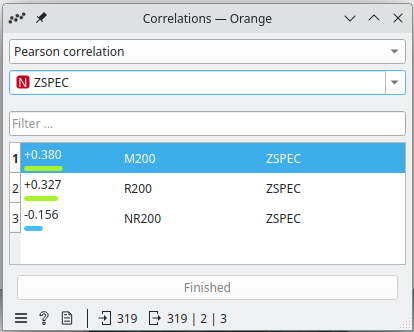

Shows the same result.

## Heatmap of correlation

The following graph is a heatmap of the matrix of correlation coefficients between pairs of features, which compares the coefficients between different features in a dataset, and allows you to visualize how much correlation exists between different variables.

The `corr` method uses the [Pearson Correlation Coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) ($r$) which is a measure of the linear correlation between two sets of data, calculated using the ratio between the covariance of two variables and the product of their standard deviations. It is a normalized measure of covariance, represented by a number between -1 and 1. 1 would represent an unrealistically perfect correlation. Like covariance itself, the measure can only reflect a linear correlation of variables and ignores many other types of relationships or correlations.

<AxesSubplot:>

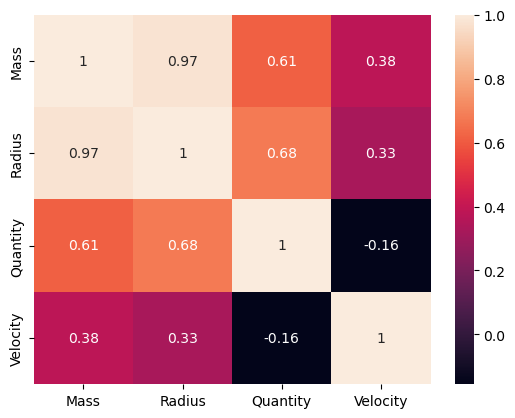

In [41]:
sns.heatmap(dff.corr(), annot=True)

The best linear correlation found is between Mass and Radius (0.97).

## Pair Plot

Pair plot to visually represent the positive/negative correlation between the variables:

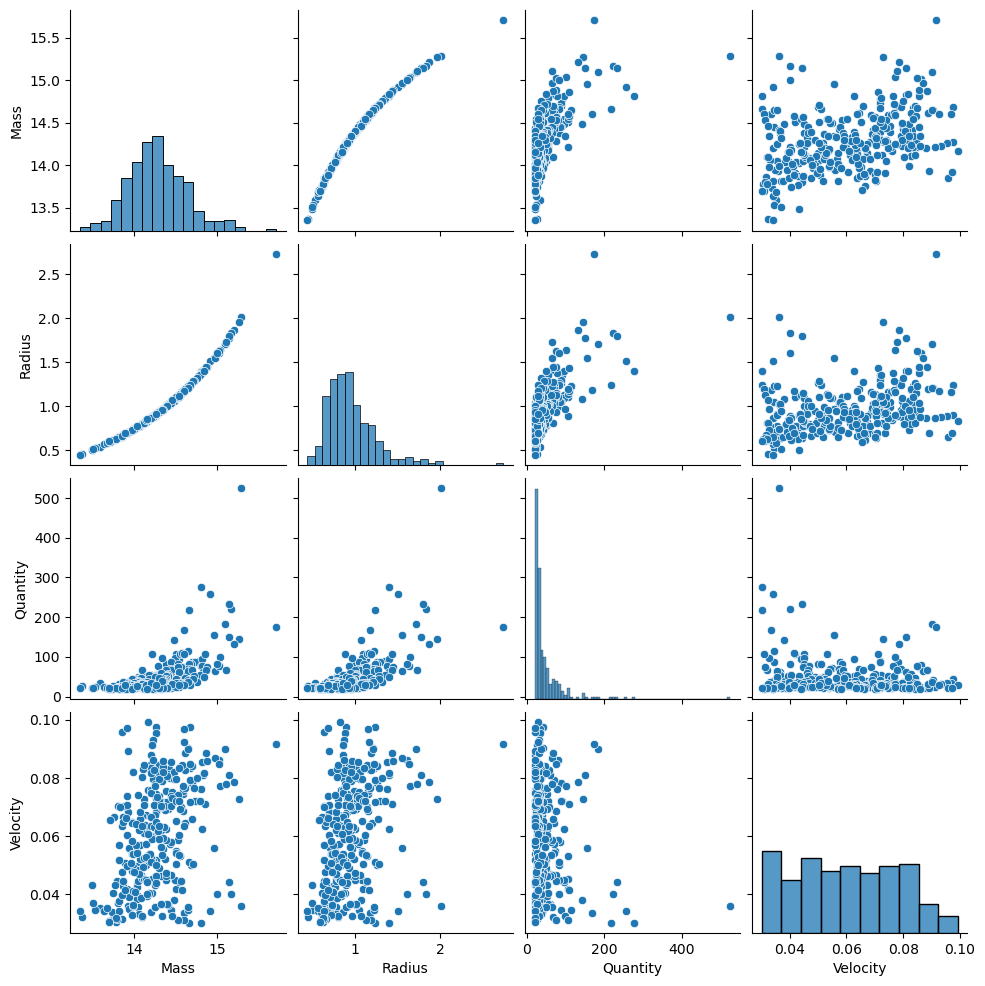

In [42]:
sns.pairplot(dff)

The graphs above show that Mass and Radius (best correlation) have a well-defined curve, and the rest have sparse points. A characteristic about these two variables is that they have a distribution that resembles the Gaussian one.

## Graph of some pair of variables

A few pairs of variables were selected, to look for eventual patterns.

### Velocity x Mass

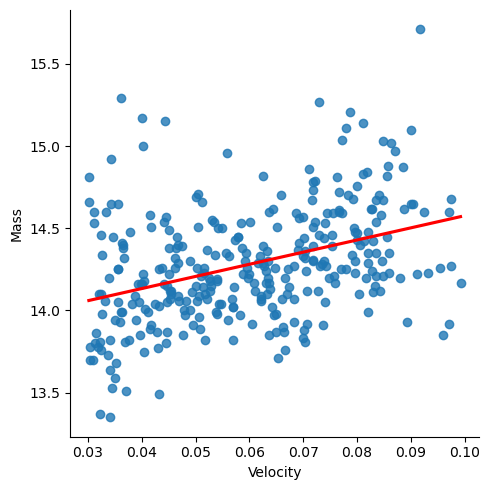

In [44]:
sns.lmplot(x='Velocity',
           y='Mass',
           data=df[["Velocity", "Mass"]],
           line_kws={"color": "red"},
           ci=None)

Just by way of illustration, the same graph generated with the orange software:

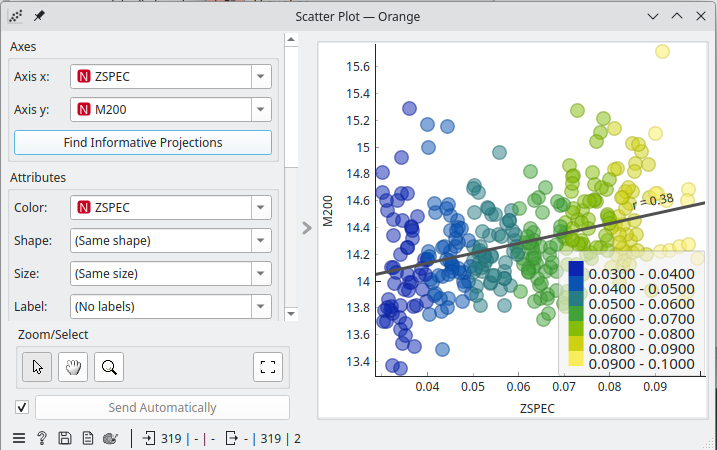

These two variables have $r$ = 0.38 which is a relatively low value, and visually the data is scattered.

### Velocity x Radius

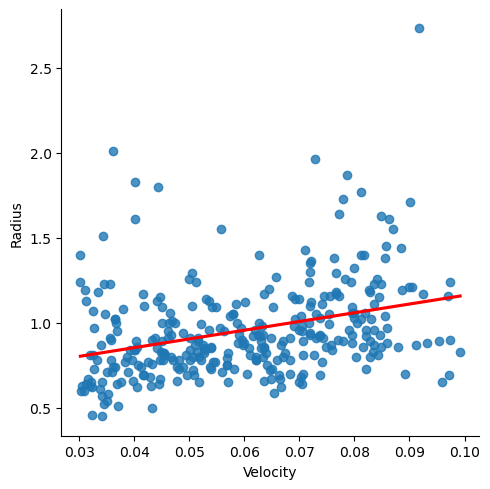

In [43]:
sns.lmplot(x='Velocity',
           y='Radius',
           data=df[["Velocity", "Radius"]],
           line_kws={"color": "red"},
           ci=None)

For this pair of variables $r$ = 0.33 which is a little worse than the previous pair, and visually the data is irregularly dispersed.

### Velocity x Quantity

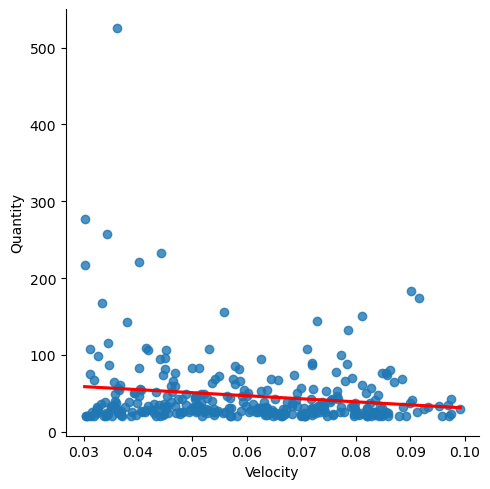

In [42]:
sns.lmplot(x='Velocity',
           y='Quantity',
           data=df[["Velocity", "Quantity"]],
           line_kws={"color": "red"},
           ci=None)

This pair has an interesting pattern in the lower part of the chart, showing an accumulation of points, but they are parallel to the lower axis and therefore would not be useful to relate to the vertical axis.

### Radius x Mass

The variables Mass and Radius have a high correlation (0.97). Let's plot the graph of the two variables. This same graph can also be seen in the above "Pair plot" graph:

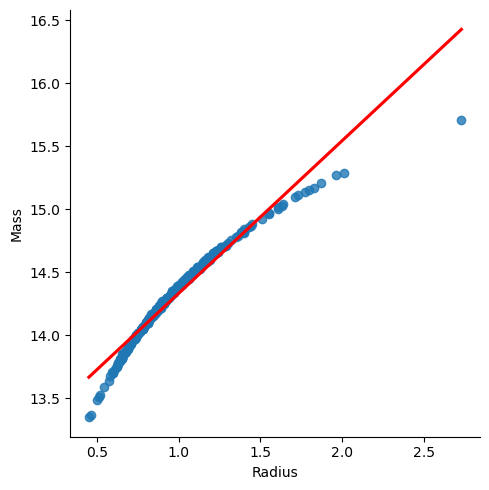

In [41]:
sns.lmplot(x='Radius',
           y='Mass',
           data=df[["Radius", "Mass"]],
           line_kws={"color": "red"},
           ci=None)

This is the pair that stands out and has the best $r$, being relatively close to 1, which is a good value. Visually the data is arranged in a slight curve and is concentrated in a range.

## MLR using Velocity as dependent variable

As seen in the Pair Plot chart, the Velocity variable does not have a good relationship with the other variables, and the best value of $r$ is 0.38 with respect to Mass. Even so, let's try using MLR to investigate whether it's possible to improve the correlation.

For this experiment, MLR uses 3 independent variables ("Mass", "Radius", "Quantity") and 1 dependent variable ("Velocity").

*LinearRegression* and *fit* fit a linear model with coefficients to minimize the residual sum of squares between the observed targets in the data set and the targets predicted by the linear approximation. The input to the routine is the fitting method matrices (X, y) and the output is the linear model coefficients, stored in its *coef_* member, and the independent term in the linear model, stored in its *intercept_* member :

In [58]:
X = df[['Mass', 'Radius', 'Quantity']]
y = df['Velocity']
regr = LinearRegression()
regr.fit(X.values, y.values)

LinearRegression()

*intercept_* is an attribute that represents the independent term in the linear model:

In [59]:
b0 = regr.intercept_
b0

-0.39822733602727867

*coef_* is an attribute that represents the inear model coefficients:

In [61]:
b = list(zip(X, regr.coef_))
b1 = b[0][1]
b2 = b[1][1]
b3 = b[2][1]
b

[('Mass', 0.032273637208932636),
 ('Radius', 0.009578885350066419),
 ('Quantity', -0.00025284448989816924)]

Regression equation:

In [56]:
print(
    f"Velocity = {b0:.4f} +",
    f"({b1:.4f}*Mass) +",
    f"({b2:.4f}*Radius) +",
    f"({b3:.4f}*Quantity)",
)

Velocity = 13.0647 + (0.8999*Mass) + (1.2354*Radius) + (-0.0004*Quantity)


### Prediction

After being fitted, the model can then be used to predict new values.

See the prediction for one row:

In [54]:
regr.predict([[15.29, 2.01, 525]])

array([-0.01825322])

Prediction using the entire dataset:

In [57]:
y_pred = regr.predict(X.values)

### Evaluating the model

Evaluate the model, which in this case has not been split between test and validation data.

*score* returns the forecast [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) ($R^2$), which represents the proportion of variation in the dependent variable that is predictable from the independent variables , where the best possible score is 1.0:

In [56]:
regr.score(X.values, y) * 100

38.79712254813885

*Mean Absolute Error* -- absolute difference between the actual or true values and the predicted values (lower is better):

In [58]:
metrics.mean_absolute_error(y, y_pred) * 100

1.099214701013125

*Mean Square Error* -- average of the square of the difference between the original and predicted values of the data (lower is better):

In [59]:
metrics.mean_squared_error(y, y_pred) * 100

0.019935961727216414

*Root Mean Square Error* -- standard deviation of the errors which occur when a prediction is made on a dataset (lower is better):

In [60]:
np.sqrt(metrics.mean_squared_error(y, y_pred)) * 100

1.411947652259687

What can be observed in the values above is that the use of MLR did not bring much benefit, in this specific case, with Velocity as the dependent variable.

## MLR using Mass as dependent variable

What changes with respect to the MRL in the previous section is the swap between the "Velocity" and "Mass" variables.

Most of the comments are close to the previous section, and will not be repeated.

MLR using 3 independent variables ("Velocity", "Radius", "Quantity") and 1 dependent variable ("Mass").

In [65]:
X = df[['Velocity', 'Radius', 'Quantity']]
y = df['Mass']
regr = LinearRegression()
regr.fit(X.values, y.values)

LinearRegression()

In [66]:
b0 = regr.intercept_
b0

13.064655241746074

In [67]:
b = list(zip(X, regr.coef_))
b1 = b[0][1]
b2 = b[1][1]
b3 = b[2][1]
b

[('Velocity', 0.8998778547396951),
 ('Radius', 1.2353917309799234),
 ('Quantity', -0.00040292507698191926)]

Regression equation:

Velocity = $\beta0$ + ($\beta1$ * Mass) + ($\beta2$ * Radius) + ($\beta3$ * Quantity) + $e$

In [68]:
print(
    f"Velocity = {b0:.4f} +",
    f"({b1:.4f}*Mass) +",
    f"({b2:.4f}*Radius) +",
    f"({b3:.4f}*Quantity)",
)

Velocity = 13.0647 + (0.8999*Mass) + (1.2354*Radius) + (-0.0004*Quantity)


Prediction for one row:

In [57]:
regr.predict([[0.0361, 2.01, 525]])

array([15.36874255])

The "exact" value:

In [9]:
y[0]

15.29

Prediction using the entire dataset:

In [12]:
y_pred = regr.predict(X.values)

### Evaluating the model

Evaluating the model without splitting the data between test and validation.

$R^2$ -- coefficient of determination:

In [10]:
regr.score(X.values, y) * 100

95.49485376372644

*Mean Absolute Error* -- absolute difference between the actual or true values and the predicted values (lower is better):

In [13]:
metrics.mean_absolute_error(y, y_pred) * 100

4.815980288177702

*Mean Square Error* -- average of the square of the difference between the original and predicted values of the data (lower is better):

In [14]:
metrics.mean_squared_error(y, y_pred) * 100

0.5558694966767489

*Root Mean Square Error* -- standard deviation of the errors which occur when a prediction is made on a dataset (lower is better):

In [15]:
np.sqrt(metrics.mean_squared_error(y, y_pred)) * 100

7.455665608627769

The above evaluation shows that the value of $R^2$ is good, demonstrating what was seen in the Heatmap, where the variables Mass and Radius have a good correlation (0.97). In this case, Mass is being used as the dependent variable and Radius is among the independent variables.

## Comparing the $R^2$ for various MLR combinations

The following evaluation tries to find the best value of $R^2$ among the combinations of variables in the MLR model.

In [20]:
X2 = df[['Velocity']]
y2 = df['Mass']
regr2 = LinearRegression()
regr2.fit(X2.values, y2.values)
regr2.score(X2.values, y2) * 100

14.42759682076269

In [23]:
X2 = df[['Velocity', 'Quantity']]
y2 = df['Mass']
regr2 = LinearRegression()
regr2.fit(X2.values, y2.values)
regr2.score(X2.values, y2) * 100

60.83668300124299

In [22]:
X2 = df[['Velocity','Radius']]
y2 = df['Mass']
regr2 = LinearRegression()
regr2.fit(X2.values, y2.values)
regr2.score(X2.values, y2) * 100

95.3888355963784

In [21]:
X2 = df[['Velocity','Radius', 'Quantity']]
y2 = df['Mass']
regr2 = LinearRegression()
regr2.fit(X2.values, y2.values)
regr2.score(X2.values, y2) * 100

95.49485376372644

In [24]:
X2 = df[['Radius']]
y2 = df['Mass']
regr2 = LinearRegression()
regr2.fit(X2.values, y2.values)
regr2.score(X2.values, y2) * 100

94.97002386020124

The best $R^2$ obtained corresponds to the combination of Mass and Radius variables only.

### Dataset splitting

We have already determined that mass and radius have the best correlation. Now let's split the dataset model into testing and training, which is a model validation procedure that reveals how the model behaves on new data. This time we'll just focus on Mass and Radius.

Splitting the dataset into train and test set :

In [110]:
X = df[['Radius']]
y = df['Mass']

In [111]:
X.head()

,Radius
0,2.01
1,1.24
2,1.40
3,1.18
4,1.10


In [112]:
y.head()

0    15.29
1    14.66
2    14.81
3    14.60
4    14.51
Name: Mass, dtype: float64

In [113]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=100)

In [114]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((223, 1), (223,), (96, 1), (96,))

In [115]:
mlr = LinearRegression()
mlr.fit(X_train.values, y_train.values)

LinearRegression()

In [116]:
b0 = mlr.intercept_
b0

13.074611871287267

In [117]:
b = list(zip(X, mlr.coef_))
b

[('Radius', 1.2657113852566084)]

Regression equation:

In [118]:
print(
    f"Radius = {b0:.4f} +",
    f"({b1:.4f}*Mass)"
)

Radius = 13.0746 + (0.8999*Mass)


Prediction on the test set:

In [119]:
y_pred_mlr = mlr.predict(X_test.values)

Compare actual and predicted value:

In [120]:
pred = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
pred

,Actual value,Predicted value
263,14.24,14.201095
305,13.78,13.872010
123,14.17,14.125152
1,14.66,14.644094
97,14.70,14.669408
...,...,...
32,14.34,14.302352
159,14.17,14.150467
241,13.78,13.872010
268,13.68,13.808724


Plot actual and predicted:

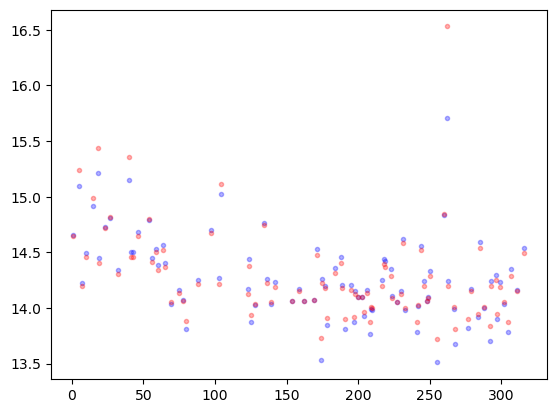

In [121]:
plt.plot(pred.index, y_test, 'b.', alpha=0.3)
plt.plot(pred.index, y_pred_mlr, 'r.', alpha=0.3)
plt.show()

In the graph above, the red dots are the forecast and the blue dots are the original values from the data set, for comparison. The graph shows that the points are scattered but close together, and in some cases the forecast matches the exact value.

### Evaluating the Model

R squared (%) - coefficient of determination, how many points fall on the regression line:

In [122]:
mlr.score(X.values, y) * 100

94.7562295134896

Mean Absolute Error (%) - absolute difference between the actual or true values and the predicted values (lower is better):

In [123]:
metrics.mean_absolute_error(y_test, y_pred_mlr) * 100

5.397455195250759

Mean Square Error (%) - average of the square of the difference between the original and predicted values of the data (lower is better):

In [124]:
metrics.mean_squared_error(y_test, y_pred_mlr) * 100

1.1102726492281092

Root Mean Square Error (%) - standard deviation of the errors which occur when a prediction is made on a dataset (lower is better):

In [125]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr)) * 100

10.536947609379622

### Add intercept to the model

*statsmodels OLS* (Ordinary Least Squares) performs regression and model fit. According to the *statsmodels* documentation, an intercept is not included by default and must be added by the user via *add_constant*.

*add_constant* adds a column of ones to the matrix, referring to the constant term.

In [126]:
X_train_sm = sm.add_constant(X_train)

### Fit the regression line

In [127]:
lr = sm.OLS(y_train, X_train_sm).fit()

### Results

*params* has the fit coefficients

In [129]:
b_coef, m_coef = lr.params  # params has the fit coefficients
b_err, m_err = lr.bse  # bse has the standard error
print(f'slope: m={m_coef:.3f} +/- {m_err:.3f}')
print(f'intercept: b={b_coef:.3f} +/- {b_err:.3f}')

slope: m=1.266 +/- 0.017
intercept: b=13.075 +/- 0.017


In [90]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Mass   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     5514.
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          2.98e-158
Time:                        17:47:22   Log-Likelihood:                 286.69
No. Observations:                 223   AIC:                            -569.4
Df Residuals:                     221   BIC:                            -562.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0746      0.017    772.970      0.000      13.041      13.108
Radius         1.2657      0.017     74.257      0.000       1.232       1.299
==============================================================================
Omnibus:                      125.650   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              594.183
Skew:                          -2.330   Prob(JB):                    9.43e-130
Kurtosis:                       9.498   Cond. No.                         7.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

\
In the summary above, "R-squared" is $R^2$ already commented out earlier.

[F-statistic](https://en.wikipedia.org/wiki/F-test) is the test statistic for the analysis of variance (ANOVA) approach to test the significance of the model or the components in the model. It can be used to find the joint significance of multiple independent variables. Allows you to compare two competing regression models in their ability to “explain” the variance in the dependent variable. It seeks to answer “Does the introduction of these variables give us greater information gain when trying to explain the variation in our target?". It is most often used when comparing statistical models.

### Calculating the residual

In [101]:
residual=pred['Actual value'] - pred['Predicted value']
residual

263    0.038905
305   -0.092010
123    0.044848
1      0.015906
97     0.030592
         ...   
32     0.037648
159    0.019533
241   -0.092010
268   -0.128724
136    0.033591
Length: 96, dtype: float64

### Residuals Histogram

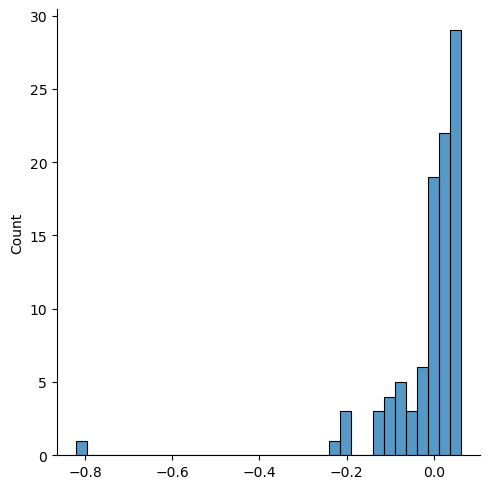

In [105]:
sns.displot(residual)

The histogram of residuals shows a concentration close to zero, and a single point relatively far from the concentration.

### Residual scatter plot

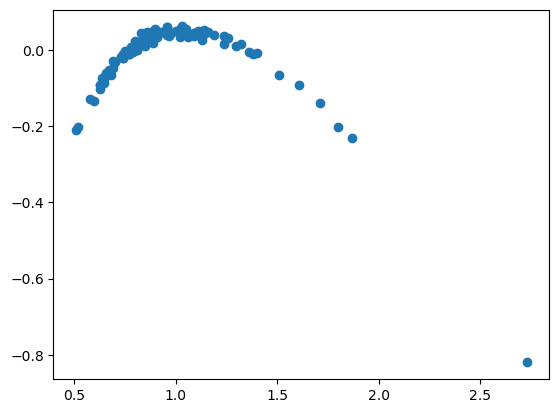

In [107]:
plt.scatter(X_test, residual)

The scatter plot follows the trend of the previous plot, with points close to zero residuals.

### Visualizing the fit on the test set

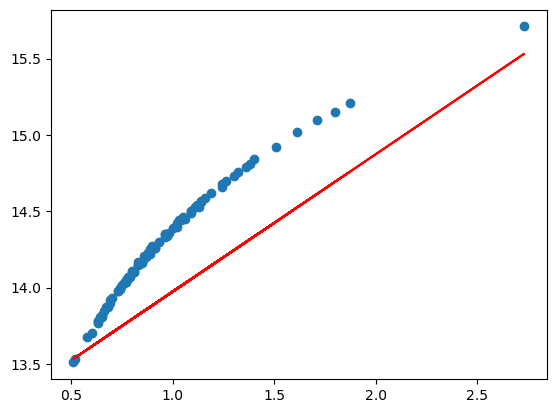

In [109]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 13.0746 + 0.8999 * X_test, 'r')

# Conclusion

This Notebook evaluated a dataset of galaxies, trying to find a relationship or pattern between Velocity, Mass, Radius, and Quantity variables. The study started by trying to use Velocity as a dependent variable, even though the Heatmap already showed that there was no good correlation with the other variables. Various combinations of variables were used with MLR looking for the best $R^2$. Finally, the Mass and Radius variables were selected because the Heatmap and the MLR comparison showed that they had a good correlation.

# References

- https://www.w3schools.com/python/python_ml_multiple_regression.asp/
- https://medium.com/machine-learning-with-python/multiple-linear-regression-implementation-in-python-2de9b303fc0c/
- https://learn.theprogrammingfoundation.org/getting_started/intro_data_science/module2/
- https://www.scribbr.com/statistics/pearson-correlation-coefficient/